In [107]:
from astropy.io import fits, ascii
from astropy.table import Table
import glob, pdb
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [3]:
files_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')[:306]

In [73]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [74]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, files_a1)
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, files_b4)

In [7]:
ts_a1 = rl.time_series(centers_a1[1], centers_a1[2], files_a1, 70, 72, 80)
ts_b4 = rl.time_series(centers_b4[1], centers_b4[2], files_b4, 70, 72, 80)

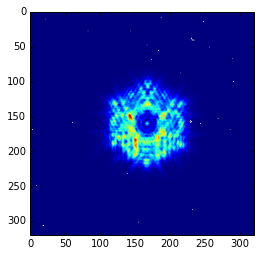

In [61]:
im, _, _, mask = rl.test_image(files_a1[76])
plt.imshow(im)

In [78]:
src_ap1 = rl.photometry(im, [centers_a1[1][76]+35], [centers_a1[2][76]], mask, shape = 'Rect', ht = 85, wid = 35)[1]
src_ap2 = rl.photometry(im, [centers_a1[1][76]-35], [centers_a1[2][76]], mask, shape = 'Rect', ht = 85, wid = 35)[1]
bkg_ap1 = rl.photometry(im, [centers_a1[1][76]+85], [centers_a1[2][76]], mask, shape = 'Rect', ht = 85, wid = 35)[1]
bkg_ap2 = rl.photometry(im, [centers_a1[1][76]-85], [centers_a1[2][76]], mask, shape = 'Rect', ht = 85, wid = 35)[1]

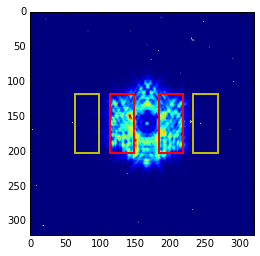

In [79]:
plt.imshow(im)
src_ap1.plot(color='r',linewidth=2)
src_ap2.plot(color='r',linewidth=2)
bkg_ap1.plot(color='y',linewidth=2)
bkg_ap2.plot(color='y',linewidth=2)

In [48]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [80]:
left_ts = rl.time_series(centers_a1[1]-35, centers_a1[2], files_a1, w = 35, h = 85, bg_xcen = centers_a1[1]-85, 
                         bg_ycen = centers_a1[2], src_shape = 'Rect', bkg_shape = 'Rect')
right_ts = rl.time_series(centers_a1[1]+35, centers_a1[2], files_a1, w = 35, h = 85, bg_xcen = centers_a1[1]+85, 
                          bg_ycen = centers_a1[2], src_shape = 'Rect', bkg_shape = 'Rect')

In [81]:
ratio = left_ts['res_flux']/right_ts['res_flux']
np.std(ratio)/np.median(ratio)

0.00059583041518824229

In [86]:
left = np.std(left_ts['res_flux'])/np.median(left_ts['res_flux'])
right = np.std(right_ts['res_flux'])/np.median(right_ts['res_flux'])
left, right

(0.0015528876204511895, 0.0016294545923854081)

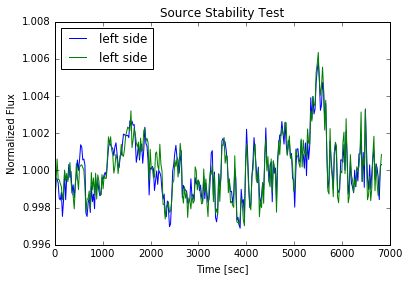

In [85]:
plt.plot(left_ts['time'], left_ts['res_flux']/np.median(left_ts['res_flux']), label = 'left side')
plt.plot(right_ts['time'], right_ts['res_flux']/np.median(right_ts['res_flux']), label = 'left side')
plt.legend(loc = 'best')
plt.title('Source Stability Test')
plt.xlabel('Time [sec]')
plt.ylabel('Normalized Flux')

In [84]:
np.median((left_ts['res_flux']-right_ts['res_flux'])/left_ts['res_flux'])*100

9.1692392448664375

# All tests

In [87]:
test = ['SUB', 'SUB640', 'FULL1', 'FULL2', 'FULL3', 'FULL4', 'FULL5']
fnames = np.load('filenames.npy')
centers = np.load('centers.npy')

In [113]:
result = Table(names = ('Name', 'RMS', 'Deviation'), dtype = ('S8', 'f8', 'f8'))

for i, t in enumerate(test): 
    left_ts = rl.time_series(centers[2*i][1]-35, centers[2*i][2], fnames[2*i], w = 35, h = 85, 
                             bg_xcen = centers[2*i][1]-85, bg_ycen = centers[2*i][2], src_shape = 'Rect', 
                             bkg_shape = 'Rect')
    right_ts = rl.time_series(centers[2*i][1]+35, centers[2*i][2], fnames[2*i], w = 35, h = 85, 
                              bg_xcen = centers[2*i][1]+85, bg_ycen = centers[2*i][2], src_shape = 'Rect', 
                              bkg_shape = 'Rect')
    ratio = left_ts['res_flux']/right_ts['res_flux']
    stdev = (np.std(ratio)/np.median(ratio))*1e6
    dev = np.median((left_ts['res_flux']-right_ts['res_flux'])/left_ts['res_flux'])*100
    result.add_row([t, stdev, dev])

In [114]:
result

Name,RMS,Deviation
str8,float64,float64
SUB,597.492048615,9.16899284351
SUB640,447.930829254,9.11831710902
FULL1,1176.65655309,10.9749127576
FULL2,1153.62887179,11.0416722717
FULL3,1090.36841623,11.0525401691
FULL4,1267.27617418,10.9755166027
FULL5,1177.25992388,10.9733861789
